# WeatherPy: Weather Analysis Based on Latitude (3/1/2018)

Based on this analysis, latitude can only be used to predict temperature and demonstrates no relationship with a city's humidity, cloudiness, or wind speed.

To perform this analysis:
- To ensure a good sample of data, I generated 1,000 random, unique cities around the world using a combination of randomized latitude/longitude pairs and Citipy (to ensure I returned an actual city, not just a location on a map).
- To ensure that I didn't have false positives when determining if a city was a duplicate (for example, Bagdhad, Arizona and Baghdad, Iraq are two very different cities), I used the unique ID that OpenWeatherMap assigns each city to eliminate my dupes.
- I pulled weather data that corresponded to those cities from OpenWeatherMap on 3/1/2018 at approximately 3:00 AM PST.

In [35]:
# -----------------------------------------------------------------------------------
# Step 1: Import the modules 
# -----------------------------------------------------------------------------------
import seaborn as sns
import json
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import random as rd
from citipy import citipy
from localenv import apiKey

# also define my print function to make life cleaner
def displayProcessingCity(i,response):
    print(f"City #{i+1}")
    print(f"City URL: http://api.openweathermap.org/data/2.5/weather?id={response['id']}")
    print(f"City Name: {response['name']}")
    print(f"City ID: {response['id']}")
    print("----------------------------------------------------------------------------")  

## City Data

In [2]:
# -----------------------------------------------------------------------------------
# Step 2: Store all our basic API data. I'd use params, but I couldn't get it to work
# with the unique structure of some of these parameters
# -----------------------------------------------------------------------------------

tempUnits = 'Imperial'
openWeatherURL = "http://api.openweathermap.org/data/2.5/weather?"

In [23]:
# -----------------------------------------------------------------------------------
# Step 3: Pull data based on city IDs 
# -----------------------------------------------------------------------------------
# create a list that we'll store all our data in
weatherData_list = []

# create dupe checking set
cityDupeChecker = set()

# create counter
i = 0

# loop through all the cities, pull data and add to dictionaries, and print requested log information
while len(cityDupeChecker) < 1000:
    
    # set random lat and long
    latitude = rd.uniform(-90.0,90.0)
    longitude = rd.uniform(-180.0,180.0)

    # try to pull in a random value
    city = [citipy.nearest_city(latitude,longitude).city_name, citipy.nearest_city(latitude,longitude).country_code]
    
    # set value for current city and country code so we don't have to keep calling for it
    currentCityName = city[0]
    currentCountryCode = city[1]

    # get response
    try:
        response = req.get(f"{openWeatherURL}q={currentCityName},{currentCountryCode}&units={tempUnits}&APPID={apiKey}").json()
        
        try:
            if response['id'] not in cityDupeChecker:
                #show city
                displayProcessingCity(i,response)
            
                #increment counter
                i+=1
            
                # add to dupe checker
                cityDupeChecker.add(response['id'])

                # add information from response to list
                weatherData_list.append({'ID':response['id'],'Name': response['name'],\
                                         'Latitude':response['coord']['lat'],\
                                         'Humidity (%)':response['main']['humidity'],\
                                         'Temperature (Fahrenheit)':response['main']['temp'],\
                                         'Wind Speed':response['wind']['speed'],\
                                         'Cloudiness':response['clouds']['all'] })
        except:
            pass
    except Exception:
        pass
    else:    
        response = req.get(f"{openWeatherURL}q={currentCityName}&units={tempUnits}&APPID={apiKey}").json()
        
        try:
            if response['id'] not in cityDupeChecker:
                 #show city
                displayProcessingCity(i,response)
            
                #increment counter
                i+=1
            
                # add to dupe checker
                cityDupeChecker.add(response['id'])

                # add information from response to list
                weatherData_list.append({'ID':response['id'],'Name': response['name'],\
                                         'Latitude':response['coord']['lat'],\
                                         'Humidity (%)':response['main']['humidity'],\
                                         'Temperature (Fahrenheit)':response['main']['temp'],\
                                         'Wind Speed':response['wind']['speed'],\
                                         'Cloudiness':response['clouds']['all'] })
        
        except:
            pass

City #1
City URL: http://api.openweathermap.org/data/2.5/weather?id=3418910
City Name: Upernavik
City ID: 3418910
----------------------------------------------------------------------------
City #2
City URL: http://api.openweathermap.org/data/2.5/weather?id=889453
City Name: Kadoma
City ID: 889453
----------------------------------------------------------------------------
City #3
City URL: http://api.openweathermap.org/data/2.5/weather?id=2075265
City Name: Busselton
City ID: 2075265
----------------------------------------------------------------------------
City #4
City URL: http://api.openweathermap.org/data/2.5/weather?id=3833367
City Name: Ushuaia
City ID: 3833367
----------------------------------------------------------------------------
City #5
City URL: http://api.openweathermap.org/data/2.5/weather?id=6201424
City Name: Mataura
City ID: 6201424
----------------------------------------------------------------------------
City #6
City URL: http://api.openweathermap.org/data/2

City #44
City URL: http://api.openweathermap.org/data/2.5/weather?id=4031574
City Name: Provideniya
City ID: 4031574
----------------------------------------------------------------------------
City #45
City URL: http://api.openweathermap.org/data/2.5/weather?id=2074865
City Name: Carnarvon
City ID: 2074865
----------------------------------------------------------------------------
City #46
City URL: http://api.openweathermap.org/data/2.5/weather?id=1014034
City Name: Carnarvon
City ID: 1014034
----------------------------------------------------------------------------
City #47
City URL: http://api.openweathermap.org/data/2.5/weather?id=5861897
City Name: Fairbanks
City ID: 5861897
----------------------------------------------------------------------------
City #48
City URL: http://api.openweathermap.org/data/2.5/weather?id=448149
City Name: Sinjar
City ID: 448149
----------------------------------------------------------------------------
City #49
City URL: http://api.openweatherma

City #87
City URL: http://api.openweathermap.org/data/2.5/weather?id=4267710
City Name: Sitka
City ID: 4267710
----------------------------------------------------------------------------
City #88
City URL: http://api.openweathermap.org/data/2.5/weather?id=2173125
City Name: Burnie
City ID: 2173125
----------------------------------------------------------------------------
City #89
City URL: http://api.openweathermap.org/data/2.5/weather?id=3883457
City Name: Lebu
City ID: 3883457
----------------------------------------------------------------------------
City #90
City URL: http://api.openweathermap.org/data/2.5/weather?id=344979
City Name: Lebu
City ID: 344979
----------------------------------------------------------------------------
City #91
City URL: http://api.openweathermap.org/data/2.5/weather?id=2112802
City Name: Hasaki
City ID: 2112802
----------------------------------------------------------------------------
City #92
City URL: http://api.openweathermap.org/data/2.5/weat

City #130
City URL: http://api.openweathermap.org/data/2.5/weather?id=331259
City Name: Mega
City ID: 331259
----------------------------------------------------------------------------
City #131
City URL: http://api.openweathermap.org/data/2.5/weather?id=2152668
City Name: Portland
City ID: 2152668
----------------------------------------------------------------------------
City #132
City URL: http://api.openweathermap.org/data/2.5/weather?id=5746545
City Name: Portland
City ID: 5746545
----------------------------------------------------------------------------
City #133
City URL: http://api.openweathermap.org/data/2.5/weather?id=5847411
City Name: Kahului
City ID: 5847411
----------------------------------------------------------------------------
City #134
City URL: http://api.openweathermap.org/data/2.5/weather?id=2094342
City Name: Kavieng
City ID: 2094342
----------------------------------------------------------------------------
City #135
City URL: http://api.openweathermap.or

City #173
City URL: http://api.openweathermap.org/data/2.5/weather?id=504717
City Name: Filimonovo
City ID: 504717
----------------------------------------------------------------------------
City #174
City URL: http://api.openweathermap.org/data/2.5/weather?id=2092164
City Name: Lorengau
City ID: 2092164
----------------------------------------------------------------------------
City #175
City URL: http://api.openweathermap.org/data/2.5/weather?id=57000
City Name: Hobyo
City ID: 57000
----------------------------------------------------------------------------
City #176
City URL: http://api.openweathermap.org/data/2.5/weather?id=4944903
City Name: Nantucket
City ID: 4944903
----------------------------------------------------------------------------
City #177
City URL: http://api.openweathermap.org/data/2.5/weather?id=1728675
City Name: Balabac
City ID: 1728675
----------------------------------------------------------------------------
City #178
City URL: http://api.openweathermap.o

City #216
City URL: http://api.openweathermap.org/data/2.5/weather?id=1698289
City Name: Pundaguitan
City ID: 1698289
----------------------------------------------------------------------------
City #217
City URL: http://api.openweathermap.org/data/2.5/weather?id=2094027
City Name: Kieta
City ID: 2094027
----------------------------------------------------------------------------
City #218
City URL: http://api.openweathermap.org/data/2.5/weather?id=3663503
City Name: Manicore
City ID: 3663503
----------------------------------------------------------------------------
City #219
City URL: http://api.openweathermap.org/data/2.5/weather?id=5110292
City Name: Brookhaven
City ID: 5110292
----------------------------------------------------------------------------
City #220
City URL: http://api.openweathermap.org/data/2.5/weather?id=3374083
City Name: Bathsheba
City ID: 3374083
----------------------------------------------------------------------------
City #221
City URL: http://api.openwe

City #259
City URL: http://api.openweathermap.org/data/2.5/weather?id=2337542
City Name: Naze
City ID: 2337542
----------------------------------------------------------------------------
City #260
City URL: http://api.openweathermap.org/data/2.5/weather?id=4016734
City Name: Bucerias
City ID: 4016734
----------------------------------------------------------------------------
City #261
City URL: http://api.openweathermap.org/data/2.5/weather?id=2514651
City Name: Los Llanos de Aridane
City ID: 2514651
----------------------------------------------------------------------------
City #262
City URL: http://api.openweathermap.org/data/2.5/weather?id=2058430
City Name: Whyalla
City ID: 2058430
----------------------------------------------------------------------------
City #263
City URL: http://api.openweathermap.org/data/2.5/weather?id=1524298
City Name: Aksu
City ID: 1524298
----------------------------------------------------------------------------
City #264
City URL: http://api.openw

City #302
City URL: http://api.openweathermap.org/data/2.5/weather?id=2264557
City Name: Ponta do Sol
City ID: 2264557
----------------------------------------------------------------------------
City #303
City URL: http://api.openweathermap.org/data/2.5/weather?id=3573061
City Name: Saint George
City ID: 3573061
----------------------------------------------------------------------------
City #304
City URL: http://api.openweathermap.org/data/2.5/weather?id=262462
City Name: Saint George
City ID: 262462
----------------------------------------------------------------------------
City #305
City URL: http://api.openweathermap.org/data/2.5/weather?id=2026023
City Name: Bukachacha
City ID: 2026023
----------------------------------------------------------------------------
City #306
City URL: http://api.openweathermap.org/data/2.5/weather?id=5380437
City Name: Pacific Grove
City ID: 5380437
----------------------------------------------------------------------------
City #307
City URL: htt

City #345
City URL: http://api.openweathermap.org/data/2.5/weather?id=4563064
City Name: Camuy
City ID: 4563064
----------------------------------------------------------------------------
City #346
City URL: http://api.openweathermap.org/data/2.5/weather?id=2185329
City Name: Waipawa
City ID: 2185329
----------------------------------------------------------------------------
City #347
City URL: http://api.openweathermap.org/data/2.5/weather?id=6112862
City Name: Preeceville
City ID: 6112862
----------------------------------------------------------------------------
City #348
City URL: http://api.openweathermap.org/data/2.5/weather?id=5793822
City Name: Enumclaw
City ID: 5793822
----------------------------------------------------------------------------
City #349
City URL: http://api.openweathermap.org/data/2.5/weather?id=3372760
City Name: Praia da Vitoria
City ID: 3372760
----------------------------------------------------------------------------
City #350
City URL: http://api.op

City #389
City URL: http://api.openweathermap.org/data/2.5/weather?id=3374218
City Name: Santa Maria
City ID: 3374218
----------------------------------------------------------------------------
City #390
City URL: http://api.openweathermap.org/data/2.5/weather?id=3450083
City Name: Santa Maria
City ID: 3450083
----------------------------------------------------------------------------
City #391
City URL: http://api.openweathermap.org/data/2.5/weather?id=3141667
City Name: Roald
City ID: 3141667
----------------------------------------------------------------------------
City #392
City URL: http://api.openweathermap.org/data/2.5/weather?id=5866063
City Name: Kenai
City ID: 5866063
----------------------------------------------------------------------------
City #393
City URL: http://api.openweathermap.org/data/2.5/weather?id=3423146
City Name: Ilulissat
City ID: 3423146
----------------------------------------------------------------------------
City #394
City URL: http://api.openweat

City #432
City URL: http://api.openweathermap.org/data/2.5/weather?id=3894426
City Name: Coihaique
City ID: 3894426
----------------------------------------------------------------------------
City #433
City URL: http://api.openweathermap.org/data/2.5/weather?id=58933
City Name: Garowe
City ID: 58933
----------------------------------------------------------------------------
City #434
City URL: http://api.openweathermap.org/data/2.5/weather?id=4021858
City Name: Guerrero Negro
City ID: 4021858
----------------------------------------------------------------------------
City #435
City URL: http://api.openweathermap.org/data/2.5/weather?id=1684245
City Name: Tagusao
City ID: 1684245
----------------------------------------------------------------------------
City #436
City URL: http://api.openweathermap.org/data/2.5/weather?id=921786
City Name: Mitsamiouli
City ID: 921786
----------------------------------------------------------------------------
City #437
City URL: http://api.openweat

City #475
City URL: http://api.openweathermap.org/data/2.5/weather?id=3406263
City Name: Barras
City ID: 3406263
----------------------------------------------------------------------------
City #476
City URL: http://api.openweathermap.org/data/2.5/weather?id=5356012
City Name: Healdsburg
City ID: 5356012
----------------------------------------------------------------------------
City #477
City URL: http://api.openweathermap.org/data/2.5/weather?id=2014833
City Name: Tura
City ID: 2014833
----------------------------------------------------------------------------
City #478
City URL: http://api.openweathermap.org/data/2.5/weather?id=1254046
City Name: Tura
City ID: 1254046
----------------------------------------------------------------------------
City #479
City URL: http://api.openweathermap.org/data/2.5/weather?id=5017822
City Name: Bemidji
City ID: 5017822
----------------------------------------------------------------------------
City #480
City URL: http://api.openweathermap.org

City #518
City URL: http://api.openweathermap.org/data/2.5/weather?id=1814934
City Name: Chizhou
City ID: 1814934
----------------------------------------------------------------------------
City #519
City URL: http://api.openweathermap.org/data/2.5/weather?id=1632694
City Name: Pangkalanbuun
City ID: 1632694
----------------------------------------------------------------------------
City #520
City URL: http://api.openweathermap.org/data/2.5/weather?id=3645532
City Name: Ciudad Bolivar
City ID: 3645532
----------------------------------------------------------------------------
City #521
City URL: http://api.openweathermap.org/data/2.5/weather?id=1848976
City Name: Wajima
City ID: 1848976
----------------------------------------------------------------------------
City #522
City URL: http://api.openweathermap.org/data/2.5/weather?id=556268
City Name: Ostrovnoy
City ID: 556268
----------------------------------------------------------------------------
City #523
City URL: http://api.op

City #561
City URL: http://api.openweathermap.org/data/2.5/weather?id=2488835
City Name: Medea
City ID: 2488835
----------------------------------------------------------------------------
City #562
City URL: http://api.openweathermap.org/data/2.5/weather?id=2027042
City Name: Batagay-Alyta
City ID: 2027042
----------------------------------------------------------------------------
City #563
City URL: http://api.openweathermap.org/data/2.5/weather?id=5795906
City Name: Graham
City ID: 5795906
----------------------------------------------------------------------------
City #564
City URL: http://api.openweathermap.org/data/2.5/weather?id=4468525
City Name: Graham
City ID: 4468525
----------------------------------------------------------------------------
City #565
City URL: http://api.openweathermap.org/data/2.5/weather?id=6301965
City Name: Palmerston
City ID: 6301965
----------------------------------------------------------------------------
City #566
City URL: http://api.openweath

City #604
City URL: http://api.openweathermap.org/data/2.5/weather?id=1278827
City Name: Ambikapur
City ID: 1278827
----------------------------------------------------------------------------
City #605
City URL: http://api.openweathermap.org/data/2.5/weather?id=5363208
City Name: King City
City ID: 5363208
----------------------------------------------------------------------------
City #606
City URL: http://api.openweathermap.org/data/2.5/weather?id=2016307
City Name: Solnechnyy
City ID: 2016307
----------------------------------------------------------------------------
City #607
City URL: http://api.openweathermap.org/data/2.5/weather?id=3420768
City Name: Qasigiannguit
City ID: 3420768
----------------------------------------------------------------------------
City #608
City URL: http://api.openweathermap.org/data/2.5/weather?id=1272674
City Name: Dhupgari
City ID: 1272674
----------------------------------------------------------------------------
City #609
City URL: http://api.

City #647
City URL: http://api.openweathermap.org/data/2.5/weather?id=4380848
City Name: Centralia
City ID: 4380848
----------------------------------------------------------------------------
City #648
City URL: http://api.openweathermap.org/data/2.5/weather?id=3533462
City Name: Acapulco
City ID: 3533462
----------------------------------------------------------------------------
City #649
City URL: http://api.openweathermap.org/data/2.5/weather?id=2146219
City Name: Hervey Bay
City ID: 2146219
----------------------------------------------------------------------------
City #650
City URL: http://api.openweathermap.org/data/2.5/weather?id=779622
City Name: Havoysund
City ID: 779622
----------------------------------------------------------------------------
City #651
City URL: http://api.openweathermap.org/data/2.5/weather?id=454584
City Name: Valdemarpils
City ID: 454584
----------------------------------------------------------------------------
City #652
City URL: http://api.openw

City #690
City URL: http://api.openweathermap.org/data/2.5/weather?id=1498919
City Name: Lugovoy
City ID: 1498919
----------------------------------------------------------------------------
City #691
City URL: http://api.openweathermap.org/data/2.5/weather?id=1337619
City Name: Ugoofaaru
City ID: 1337619
----------------------------------------------------------------------------
City #692
City URL: http://api.openweathermap.org/data/2.5/weather?id=1622318
City Name: Waingapu
City ID: 1622318
----------------------------------------------------------------------------
City #693
City URL: http://api.openweathermap.org/data/2.5/weather?id=5517675
City Name: Brownfield
City ID: 5517675
----------------------------------------------------------------------------
City #694
City URL: http://api.openweathermap.org/data/2.5/weather?id=3141548
City Name: Rognan
City ID: 3141548
----------------------------------------------------------------------------
City #695
City URL: http://api.openweath

City #733
City URL: http://api.openweathermap.org/data/2.5/weather?id=1045114
City Name: Inhambane
City ID: 1045114
----------------------------------------------------------------------------
City #734
City URL: http://api.openweathermap.org/data/2.5/weather?id=5745380
City Name: Pendleton
City ID: 5745380
----------------------------------------------------------------------------
City #735
City URL: http://api.openweathermap.org/data/2.5/weather?id=4590762
City Name: Pendleton
City ID: 4590762
----------------------------------------------------------------------------
City #736
City URL: http://api.openweathermap.org/data/2.5/weather?id=1636308
City Name: Manokwari
City ID: 1636308
----------------------------------------------------------------------------
City #737
City URL: http://api.openweathermap.org/data/2.5/weather?id=2126682
City Name: Bilibino
City ID: 2126682
----------------------------------------------------------------------------
City #738
City URL: http://api.openw

City #776
City URL: http://api.openweathermap.org/data/2.5/weather?id=1028918
City Name: Pemba
City ID: 1028918
----------------------------------------------------------------------------
City #777
City URL: http://api.openweathermap.org/data/2.5/weather?id=6171633
City Name: Ucluelet
City ID: 6171633
----------------------------------------------------------------------------
City #778
City URL: http://api.openweathermap.org/data/2.5/weather?id=5881688
City Name: Fort Saint James
City ID: 5881688
----------------------------------------------------------------------------
City #779
City URL: http://api.openweathermap.org/data/2.5/weather?id=778707
City Name: Mehamn
City ID: 778707
----------------------------------------------------------------------------
City #780
City URL: http://api.openweathermap.org/data/2.5/weather?id=3897774
City Name: Buin
City ID: 3897774
----------------------------------------------------------------------------
City #781
City URL: http://api.openweatherm

City #819
City URL: http://api.openweathermap.org/data/2.5/weather?id=3861953
City Name: Chacabuco
City ID: 3861953
----------------------------------------------------------------------------
City #820
City URL: http://api.openweathermap.org/data/2.5/weather?id=5393287
City Name: Santa Rosa
City ID: 5393287
----------------------------------------------------------------------------
City #821
City URL: http://api.openweathermap.org/data/2.5/weather?id=3835994
City Name: Santa Rosa
City ID: 3835994
----------------------------------------------------------------------------
City #822
City URL: http://api.openweathermap.org/data/2.5/weather?id=3899539
City Name: Antofagasta
City ID: 3899539
----------------------------------------------------------------------------
City #823
City URL: http://api.openweathermap.org/data/2.5/weather?id=3640226
City Name: Guanare
City ID: 3640226
----------------------------------------------------------------------------
City #824
City URL: http://api.op

City #862
City URL: http://api.openweathermap.org/data/2.5/weather?id=780687
City Name: Berlevag
City ID: 780687
----------------------------------------------------------------------------
City #863
City URL: http://api.openweathermap.org/data/2.5/weather?id=6180550
City Name: Whitehorse
City ID: 6180550
----------------------------------------------------------------------------
City #864
City URL: http://api.openweathermap.org/data/2.5/weather?id=2271968
City Name: Aljezur
City ID: 2271968
----------------------------------------------------------------------------
City #865
City URL: http://api.openweathermap.org/data/2.5/weather?id=5178040
City Name: Wexford
City ID: 5178040
----------------------------------------------------------------------------
City #866
City URL: http://api.openweathermap.org/data/2.5/weather?id=217562
City Name: Butembo
City ID: 217562
----------------------------------------------------------------------------
City #867
City URL: http://api.openweathermap

City #905
City URL: http://api.openweathermap.org/data/2.5/weather?id=5961417
City Name: Husavik
City ID: 5961417
----------------------------------------------------------------------------
City #906
City URL: http://api.openweathermap.org/data/2.5/weather?id=3870282
City Name: Talcahuano
City ID: 3870282
----------------------------------------------------------------------------
City #907
City URL: http://api.openweathermap.org/data/2.5/weather?id=4647963
City Name: Paris
City ID: 4647963
----------------------------------------------------------------------------
City #908
City URL: http://api.openweathermap.org/data/2.5/weather?id=2988507
City Name: Paris
City ID: 2988507
----------------------------------------------------------------------------
City #909
City URL: http://api.openweathermap.org/data/2.5/weather?id=2126710
City Name: Beringovskiy
City ID: 2126710
----------------------------------------------------------------------------
City #910
City URL: http://api.openweathe

City #948
City URL: http://api.openweathermap.org/data/2.5/weather?id=542374
City Name: Krasnogorsk
City ID: 542374
----------------------------------------------------------------------------
City #949
City URL: http://api.openweathermap.org/data/2.5/weather?id=2413070
City Name: Nioro
City ID: 2413070
----------------------------------------------------------------------------
City #950
City URL: http://api.openweathermap.org/data/2.5/weather?id=3667868
City Name: Solano
City ID: 3667868
----------------------------------------------------------------------------
City #951
City URL: http://api.openweathermap.org/data/2.5/weather?id=1685876
City Name: Solano
City ID: 1685876
----------------------------------------------------------------------------
City #952
City URL: http://api.openweathermap.org/data/2.5/weather?id=2720679
City Name: Bollnas
City ID: 2720679
----------------------------------------------------------------------------
City #953
City URL: http://api.openweathermap.o

City #991
City URL: http://api.openweathermap.org/data/2.5/weather?id=300058
City Name: Susurluk
City ID: 300058
----------------------------------------------------------------------------
City #992
City URL: http://api.openweathermap.org/data/2.5/weather?id=1738050
City Name: Miri
City ID: 1738050
----------------------------------------------------------------------------
City #993
City URL: http://api.openweathermap.org/data/2.5/weather?id=6113828
City Name: Provost
City ID: 6113828
----------------------------------------------------------------------------
City #994
City URL: http://api.openweathermap.org/data/2.5/weather?id=3391287
City Name: Prainha
City ID: 3391287
----------------------------------------------------------------------------
City #995
City URL: http://api.openweathermap.org/data/2.5/weather?id=2175819
City Name: Biloela
City ID: 2175819
----------------------------------------------------------------------------
City #996
City URL: http://api.openweathermap.org

In [52]:
# -----------------------------------------------------------------------------------
# Step 4: Create a pretty dataframe that we can reference because visual aids are
# the actual best thing ever and export a CSV we can hang onto
# -----------------------------------------------------------------------------------
cleanedWeather_df = pd.DataFrame(weatherData_list).set_index('ID')

# rearrange columns sensibly
cleanedWeather_df = cleanedWeather_df[['Name', 'Latitude', 'Temperature (Fahrenheit)',\
                                       'Humidity (%)', 'Wind Speed','Cloudiness']].sort_index(ascending=True)

# export the csv
cleanedWeather_df.to_csv("WeatherData.csv")

# eyeball our data
cleanedWeather_df.head()

,Name,Latitude,Temperature (Fahrenheit),Humidity (%),Wind Speed,Cloudiness
ID,,,,,,
53157,Qandala,11.47,80.53,59,4.36,0
53654,Mogadishu,2.04,87.80,70,14.99,20
57000,Hobyo,5.35,84.04,64,12.64,0
58933,Garowe,8.41,90.83,36,7.72,0
60019,Eyl,7.98,82.51,74,11.97,0


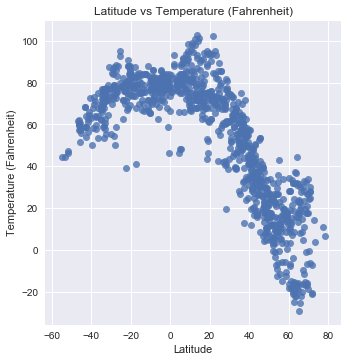

In [89]:
# -----------------------------------------------------------------------------------
# Step 5: Generate charts.
#  1) Temperature (F) vs. Latitude
#  2) Humidity (%) vs. Latitude
#  3) Cloudiness (%) vs. Latitude
#  4) Wind Speed (mph) vs. Latitude
# -----------------------------------------------------------------------------------
sns.set()

# Chart 1: Temperature vs Latitude
latVsTemp_plot = sns.lmplot(x='Latitude', y='Temperature (Fahrenheit)', data=cleanedWeather_df,\
                           fit_reg=False)
plt.title("Latitude vs Temperature (Fahrenheit)")
plt.savefig("latXtemp.png")
plt.show()

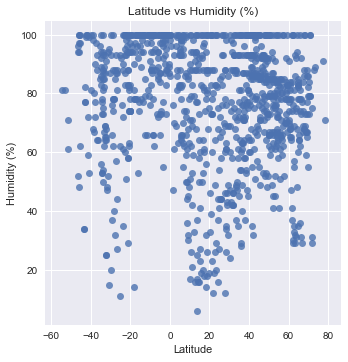

In [90]:
# Chart 2: humidity vs Latitude
latVsTemp_plot = sns.lmplot(x='Latitude', y='Humidity (%)', data=cleanedWeather_df,\
                           fit_reg=False)
plt.title("Latitude vs Humidity (%)")
plt.savefig("latXhumid.png")
plt.show()

There is no relationship between latitude and humidity.

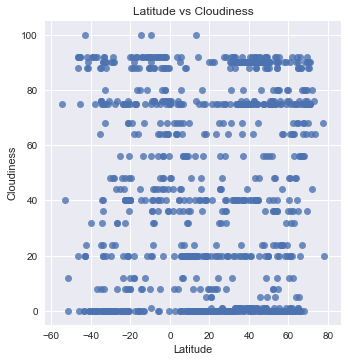

In [91]:
# Chart 3: cloudiness vs Latitude
latVsTemp_plot = sns.lmplot(x='Latitude', y='Cloudiness', data=cleanedWeather_df,\
                           fit_reg=False)
plt.title("Latitude vs Cloudiness")
plt.savefig("latXcloud.png")
plt.show()

There is no relationship between latitude and cloudiness.

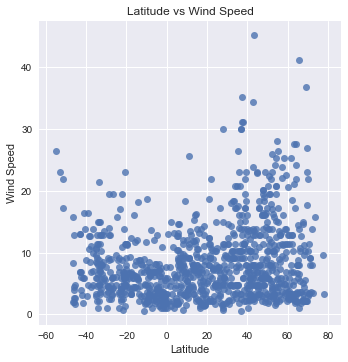

In [92]:
# Chart 4: wind speed vs Latitude
latVsTemp_plot = sns.lmplot(x='Latitude', y='Wind Speed', data=cleanedWeather_df,\
                           fit_reg=False)
plt.title("Latitude vs Wind Speed")
plt.savefig("latXwind.png")
plt.show()

There is no apparent relationship between latitude and wind speed.